In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,15)

In [419]:
paths = ['/home/administrator/AI-K2-UB/Sorted/1/CAM6_12042018_08:59_90.33_1.jpg',
        '/home/administrator/AI-K2-UB/Sorted/4/1073_CAM6_23022018_10_11_58_4.jpg', 
        '/home/administrator/AI-K2-UB/Sorted/4/1073_CAM6_23022018_10_11_58_4.jpg',
        '/home/administrator/AI-K2-UB/Sorted/3/1130_CAM6_22032018_16_04_98_3.jpg',
        '/home/administrator/AI-K2-UB/Sorted/3/1057_CAM6_23022018_14_30_89_3.jpg',
        '/home/administrator/AI-K2-UB/Sorted/2/1083_CAM6_23022018_09_59_55_2.jpg',
        '/home/administrator/AI-K2-UB/Sorted/2/1087_CAM6_23022018_09_54_76_2.jpg',
        '/home/administrator/AI-K2-UB/Sorted/0/3338_CAM6_12022018_06_54_69_0.jpg',
        '/home/administrator/AI-K2-UB/Sorted/0/3670_CAM6_11022018_09_08_94_0.jpg',
        '/home/administrator/AI-K2-UB/Sorted/2/1154_CAM6_22032018_11_45_69_2.jpg']
    
def plot_images(images, grey):
    fig = plt.figure()
    for i in range(min(9, len(images))):
        fig.add_subplot(3, 3, i+1)
        if grey:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(images[i]) 
    plt.show()        

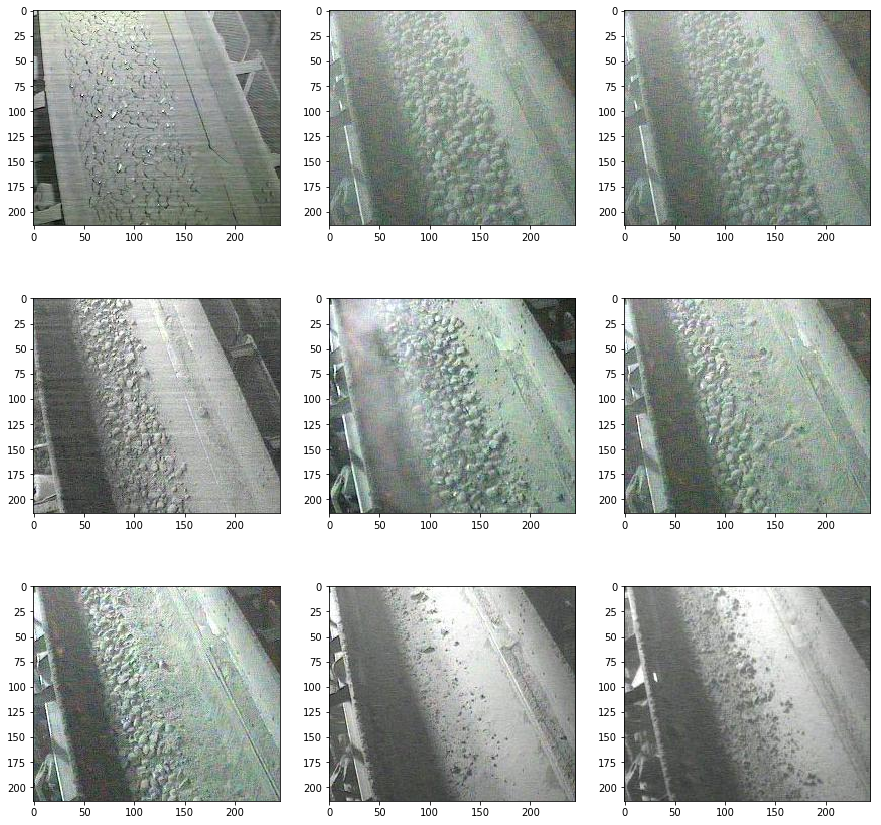

In [420]:
imgs=[]
for path in paths:
  im = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
  imgs.append(im)
plot_images(imgs, False)

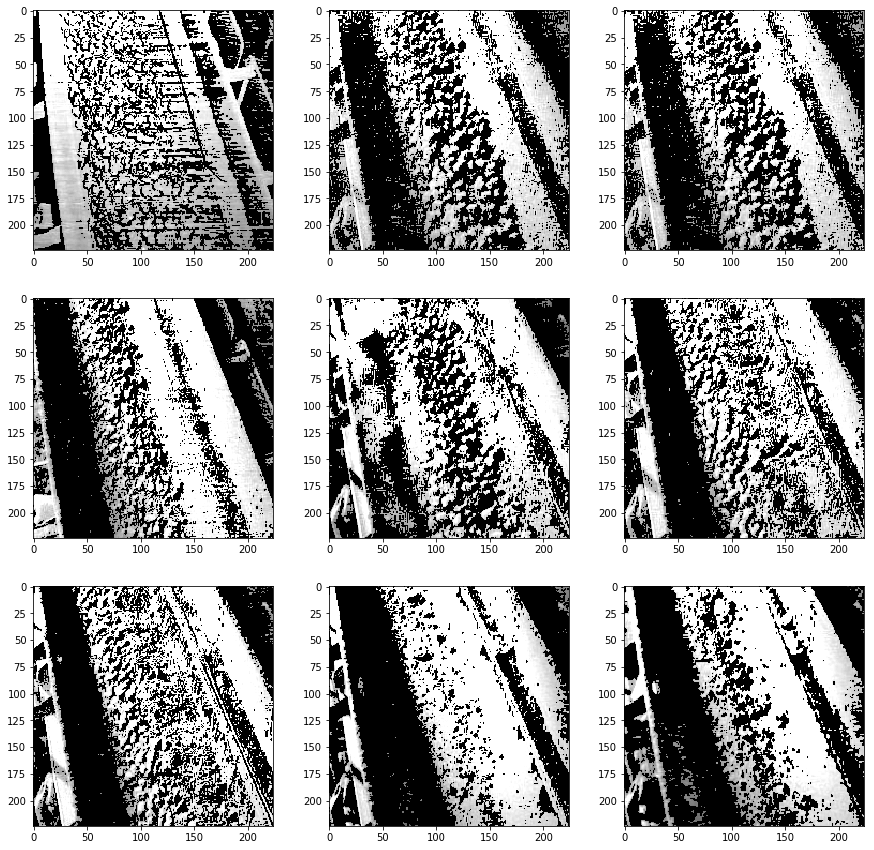

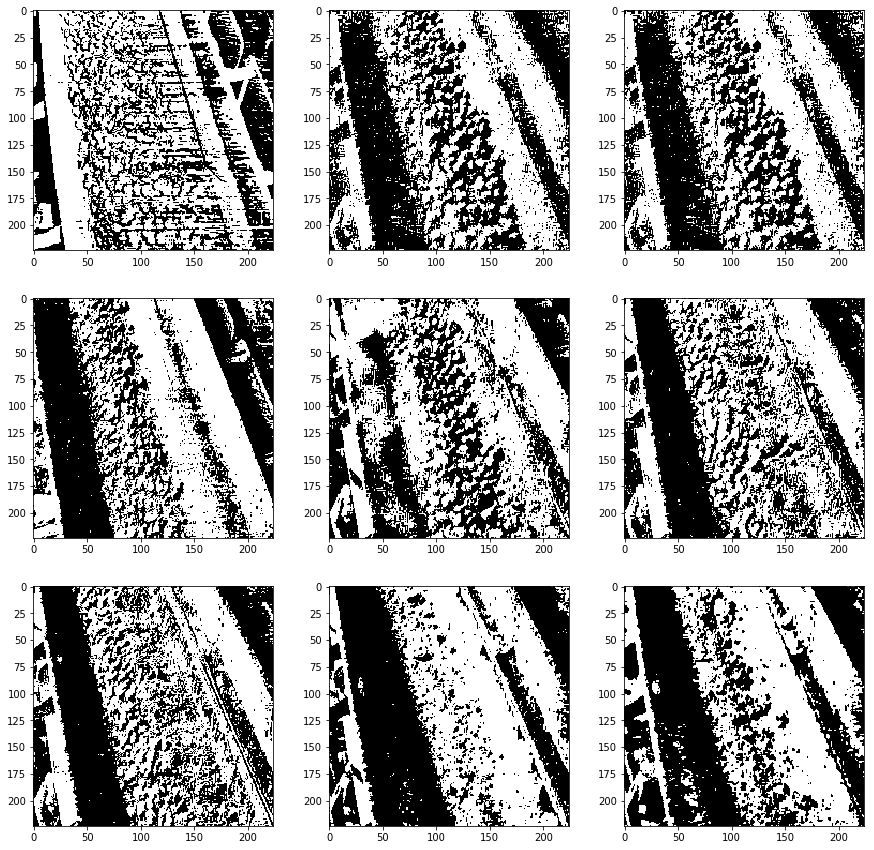

In [421]:
imgs=[]
imgs1=[]
for path in paths:
    im = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (224, 224))
    img = cv2.blur(im, (1, 1))
    img = cv2.adaptiveThreshold(img, 10,
                                cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 71, 1)
    img = cv2.multiply(img, 0.3)
    img = cv2.blur(img, (1, 1))
    imgs1.append(img)
    im = cv2.multiply(im,0.5)
    im = cv2.multiply(im, img)
    #ima = np.multiply(im, 255-igg1)
    #ima = cv2.blur(ima, (1, 1))
    imgs.append(im)
plot_images(imgs, True)
plot_images(imgs1, True)


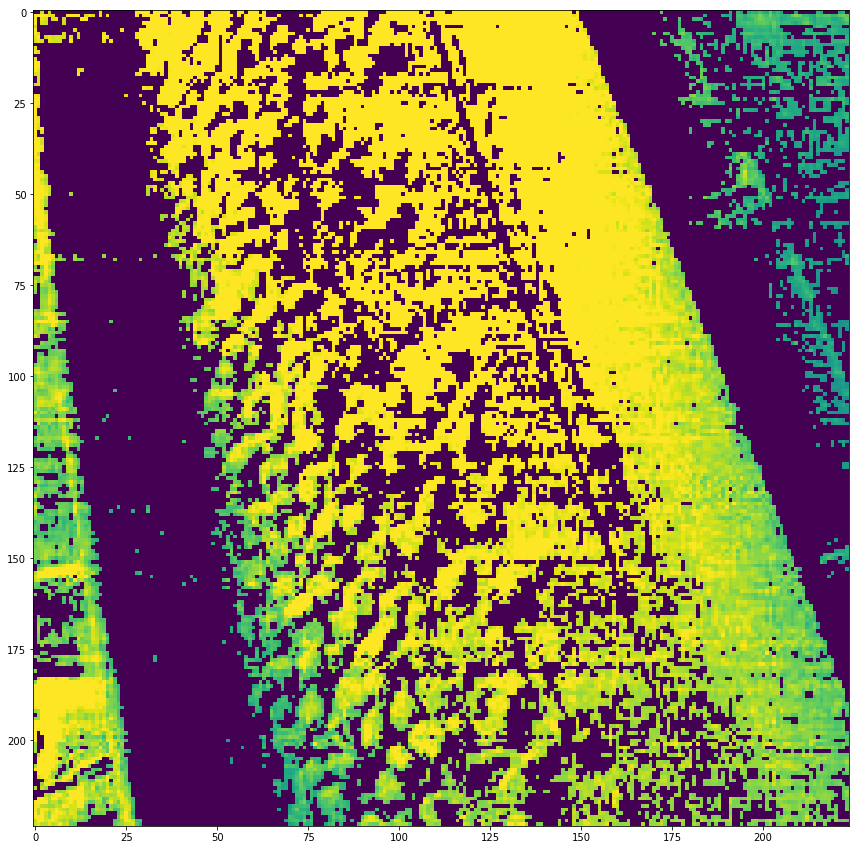

In [422]:
plt.imshow(im)

In [428]:
pt = '/home/administrator/AI-K2-UB/Sorted/1/CAM6_12042018_08:59_90.33_1.jpg'

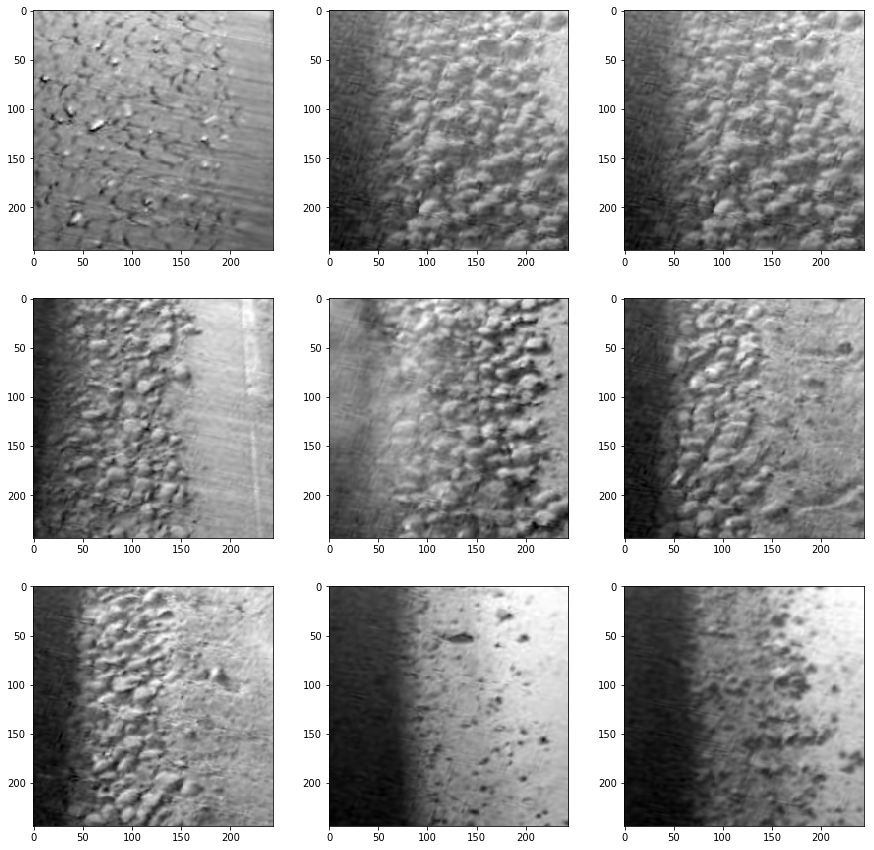

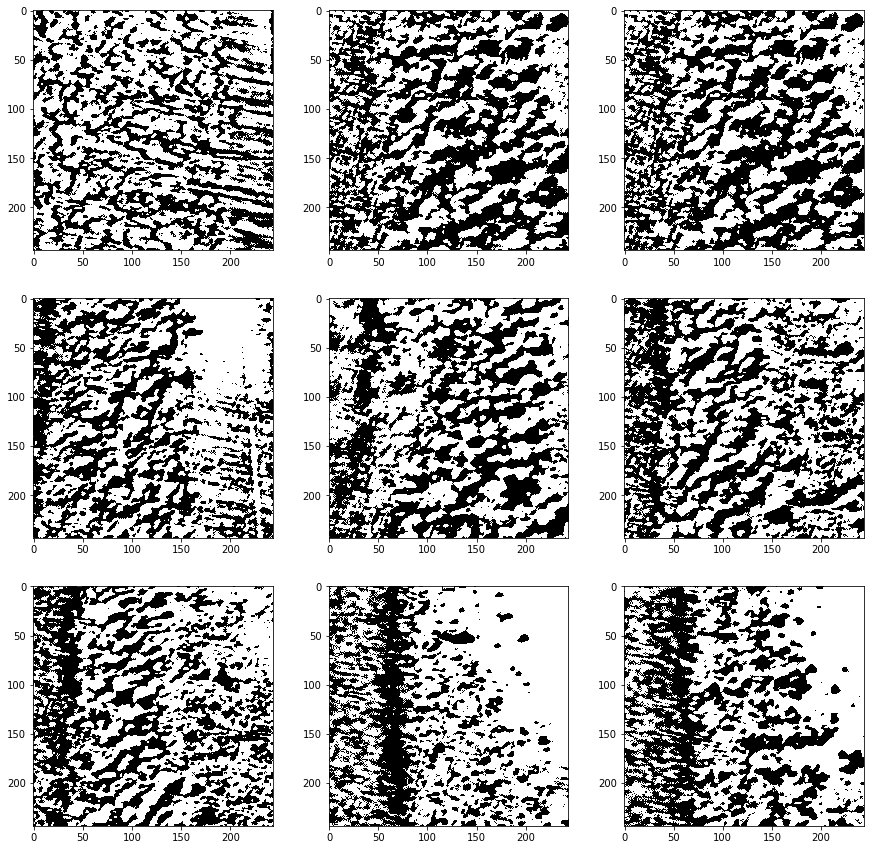

In [526]:
imgsq=[]
imgsq1=[]
for path in paths:
    im_b = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (224, 224))
    (h, w) = im_b.shape[:2]
    centr = (w/3.0, h/2)
    M = cv2.getRotationMatrix2D(centr, -15, 1.6)
    im_b = cv2.warpAffine(im_b, M, (w, h))
    im_b = im_b[0:h, 30:190]
    im_b = cv2.resize(im_b, (244, 244))
    im_g = cv2.GaussianBlur(im_b, (3, 3), 0)
    kernel = np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]])
    im_f = cv2.filter2D(im_g, -1, kernel, (-2,-2))
    im_wh = cv2.addWeighted(im_f, 1.5, im_b, -0.2, 0)
    im_ad = cv2.adaptiveThreshold(im_wh, 90, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 1)
    imgsq1.append(im_ad)
    struct_element = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
    im_erod = cv2.erode(im_ad, struct_element)
    im_dilate = cv2.dilate(im_erod, struct_element)
    ot_tr, im_dilate = cv2.threshold(im_dilate, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    hi_tr = ot_tr
    lo_tr = ot_tr * 0.5
    im_can = cv2.Canny(im_dilate, lo_tr, hi_tr)
    imgsq.append(im_b)
plot_images(imgsq, True)
plot_images(imgsq1, True)